<a href="https://colab.research.google.com/github/lamyse1/deep-learning-/blob/main/week5/Notbook5_3_with_new_dataset_lamyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# AAI612: Deep Learning & its Applications

*Notebook 5.3: KerasTuner*



Ensure that KerasTuner is installed:

In [23]:
import pandas as pd

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/harmanani/AAI612/refs/heads/main/Week3/breast_cancer/data.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
print(df.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [24]:


#  Encode the target variable 'diagnosis' (M = 1 for malignant, B = 0 for benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# : Drop the 'id' column as it is irrelevant for the model
df = df.drop(columns=['id'])

#  Normalize the input features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop(columns=['diagnosis'])
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = df['diagnosis']

# Display the processed dataset
print(X.head())
print(y.head())


   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0             

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [30]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Verify if there are still missing values
print("Missing values in X_train:", X_train.isna().sum().sum())
print("Missing values in X_test:", X_test.isna().sum().sum())




Missing values in X_train: 0
Missing values in X_test: 0


In [31]:
# Build and train the best model using the optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    verbose=2,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

# Evaluate the model on the test set
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {accuracy:.4f}")


Epoch 1/50
12/12 - 1s - 104ms/step - accuracy: 0.6731 - loss: 0.6242 - val_accuracy: 0.8462 - val_loss: 0.4912
Epoch 2/50
12/12 - 0s - 10ms/step - accuracy: 0.8846 - loss: 0.4488 - val_accuracy: 0.9011 - val_loss: 0.3641
Epoch 3/50
12/12 - 0s - 9ms/step - accuracy: 0.9121 - loss: 0.3428 - val_accuracy: 0.9341 - val_loss: 0.2960
Epoch 4/50
12/12 - 0s - 9ms/step - accuracy: 0.9258 - loss: 0.2796 - val_accuracy: 0.9341 - val_loss: 0.2560
Epoch 5/50
12/12 - 0s - 9ms/step - accuracy: 0.9341 - loss: 0.2380 - val_accuracy: 0.9341 - val_loss: 0.2290
Epoch 6/50
12/12 - 0s - 10ms/step - accuracy: 0.9478 - loss: 0.2096 - val_accuracy: 0.9451 - val_loss: 0.2092
Epoch 7/50
12/12 - 0s - 10ms/step - accuracy: 0.9505 - loss: 0.1886 - val_accuracy: 0.9451 - val_loss: 0.1943
Epoch 8/50
12/12 - 0s - 10ms/step - accuracy: 0.9533 - loss: 0.1720 - val_accuracy: 0.9560 - val_loss: 0.1822
Epoch 9/50
12/12 - 0s - 11ms/step - accuracy: 0.9615 - loss: 0.1587 - val_accuracy: 0.9560 - val_loss: 0.1725
Epoch 10/50


In [34]:
best_model.save('best_breast_cancer_model.keras')



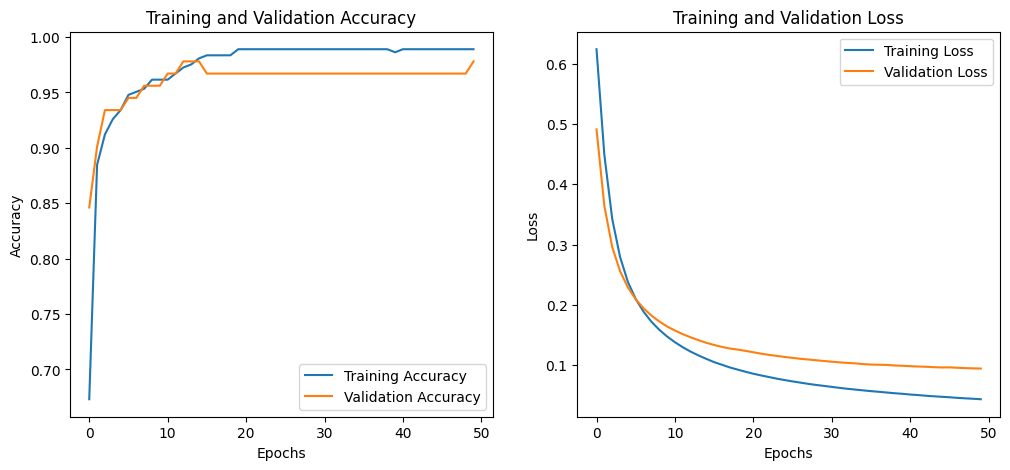

In [35]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
